In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Data_Cortex_Nuclear.csv to Data_Cortex_Nuclear.csv


In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [4]:
df=pd.read_csv("/content/Data_Cortex_Nuclear.csv")

In [5]:

df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [6]:
df.isnull().sum()

,0
MouseID,0
DYRK1A_N,3
ITSN1_N,3
BDNF_N,3
NR1_N,3
...,...
CaNA_N,0
Genotype,0
Treatment,0
Behavior,0


In [7]:
df.dropna(inplace=True)

In [8]:

df.duplicated().sum()

0

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [10]:
df['Genotype'] = label_encoder.fit_transform(df['Genotype'])
df['Treatment'] = label_encoder.fit_transform(df['Treatment'])
df['Behavior'] = label_encoder.fit_transform(df['Behavior'])
df['class'] = label_encoder.fit_transform(df['class'])


In [11]:
df.tail()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
1045,3525_11,0.382149,0.595792,0.399101,2.527574,4.629493,0.317810,0.213235,6.219567,0.232639,...,0.122308,0.507017,0.172393,0.200097,0.221994,1.141423,1,1,1,7
1046,3525_12,0.387947,0.586510,0.431650,2.527041,4.781082,0.316903,0.222111,6.307723,0.239074,...,0.121216,0.492432,0.177319,0.207593,0.235223,1.104757,1,1,1,7
1047,3525_13,0.343695,0.562547,0.361243,2.412885,3.949361,0.330158,0.225620,6.060165,0.254951,...,0.121936,0.490258,0.169076,0.182590,0.243715,1.104494,1,1,1,7
1048,3525_14,0.346594,0.551467,0.390353,2.445052,4.236201,0.343610,0.229239,6.023371,0.240676,...,0.136900,0.502282,0.180016,0.199685,0.269866,1.136585,1,1,1,7
1049,3525_15,0.365907,0.552861,0.386275,2.473812,4.347236,0.353783,0.232784,6.085354,0.242726,...,0.130069,0.487991,0.194635,0.220056,0.242514,1.085621,1,1,1,7


In [12]:

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [13]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [14]:

numerical_cols = numerical_cols.drop('class', errors='ignore')
categorical_cols = categorical_cols.drop(['MouseID', 'class'], errors='ignore')

In [18]:

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

In [19]:


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [20]:

X = df.drop(columns=['MouseID', 'class'])  # Features
y = df['class']

In [21]:
X_processed = preprocessor.fit_transform(X)

In [22]:
numerical_feature_names = numerical_cols.tolist()

In [23]:

categorical_transformer.fit(X[categorical_cols])
categorical_feature_names = categorical_transformer.get_feature_names_out(categorical_cols).tolist()

In [24]:
feature_names = numerical_feature_names + categorical_feature_names

In [25]:


X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

X_processed_df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior
0,1.436707,1.126128,1.705383,1.703232,1.499958,-0.450542,0.047550,0.077228,0.862572,0.761816,...,0.837643,-0.022167,0.591953,-0.598618,-0.883796,-1.109349,0.764351,-1.079215,-1.079215,-0.967906
1,1.232724,1.198861,1.381104,1.543155,1.528343,-0.028033,-0.303284,0.019442,0.354457,0.502343,...,1.331291,0.653422,0.324221,-0.804406,-0.484846,-1.060919,0.564395,-1.079215,-1.079215,-0.967906
2,1.361014,1.258610,1.605906,1.830294,1.698169,-0.408545,-0.085447,0.139804,0.389816,0.954070,...,1.035111,0.879360,0.249394,-0.744553,-0.499891,-1.123373,0.594418,-1.079215,-1.079215,-0.967906
3,0.989748,0.724574,0.625917,0.896770,1.022459,-0.483850,-0.560389,0.113739,-0.393751,0.349682,...,-0.079539,-0.419656,0.482464,-0.972203,-0.957253,-1.149702,0.824032,-1.079215,-1.079215,-0.967906
4,0.779828,0.738418,0.657906,0.922900,1.031234,-0.363433,-0.384122,0.181366,-0.389730,0.416548,...,0.600539,0.630430,-0.089468,-0.841942,-0.637644,-1.045776,0.704288,-1.079215,-1.079215,-0.967906


In [26]:



non_numeric_cols = df.select_dtypes(exclude=['number']).columns

for col in df.columns:
    if col not in non_numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)

for col in non_numeric_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

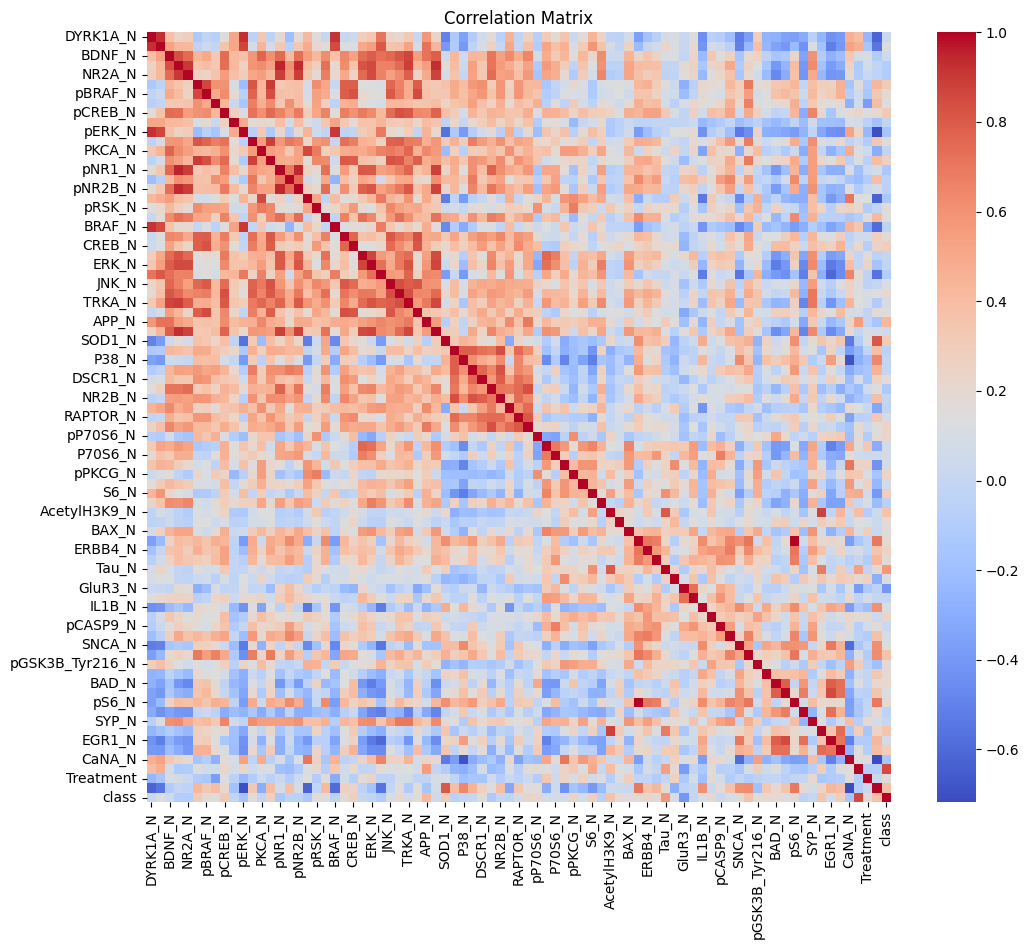

In [27]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns


df_numeric = df.drop(non_numeric_cols, axis=1)


corr_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

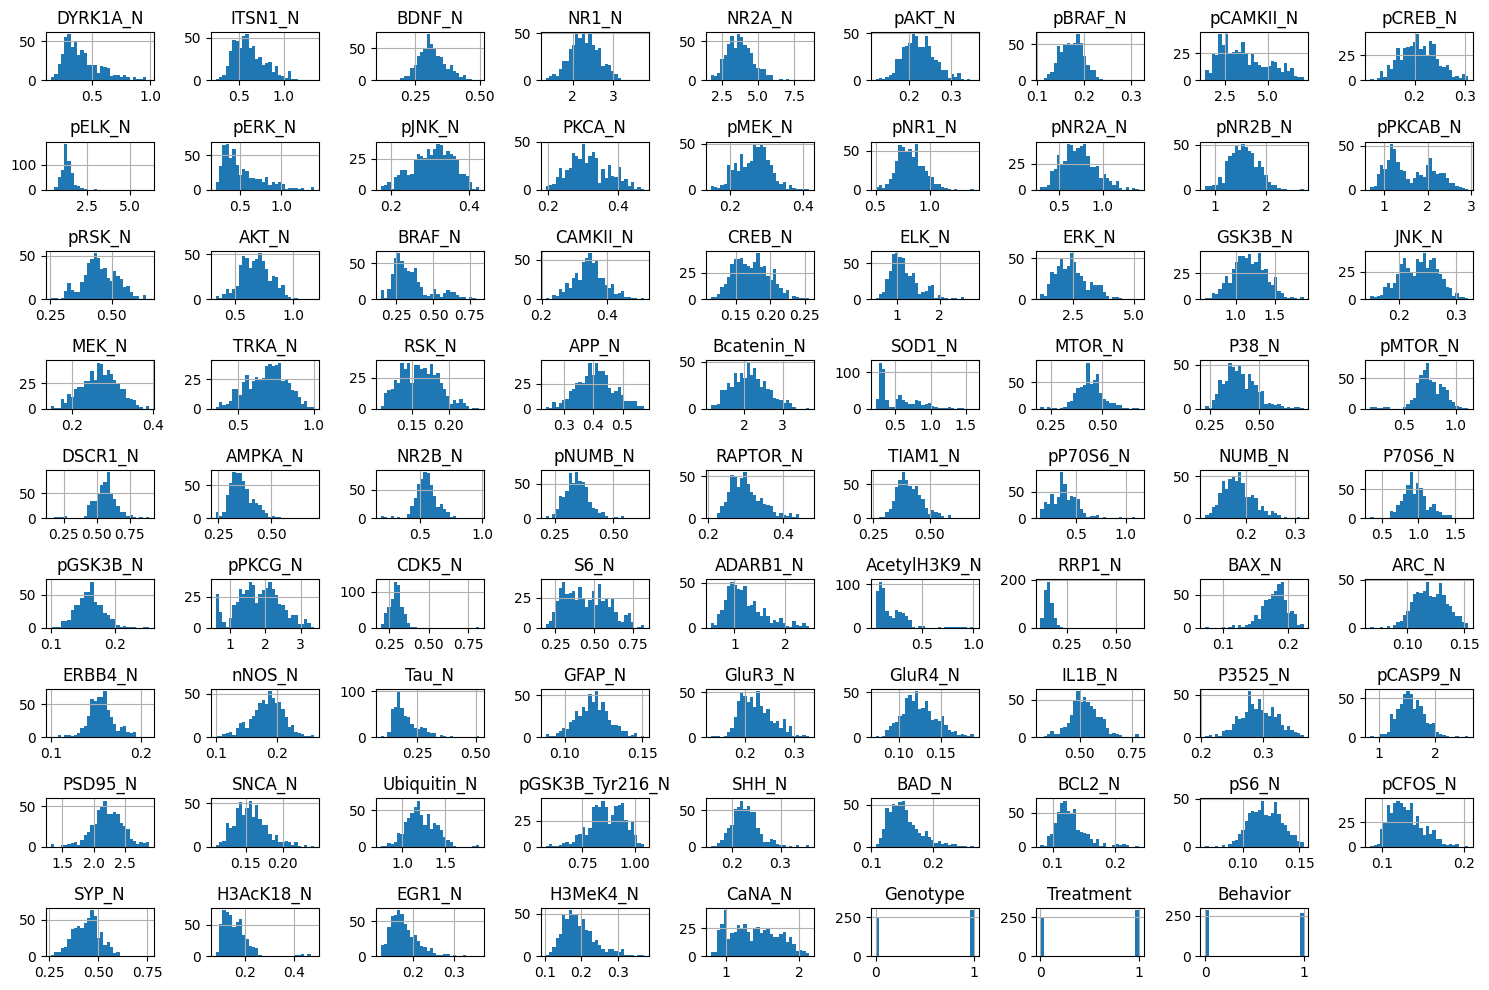

In [28]:
df[numerical_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

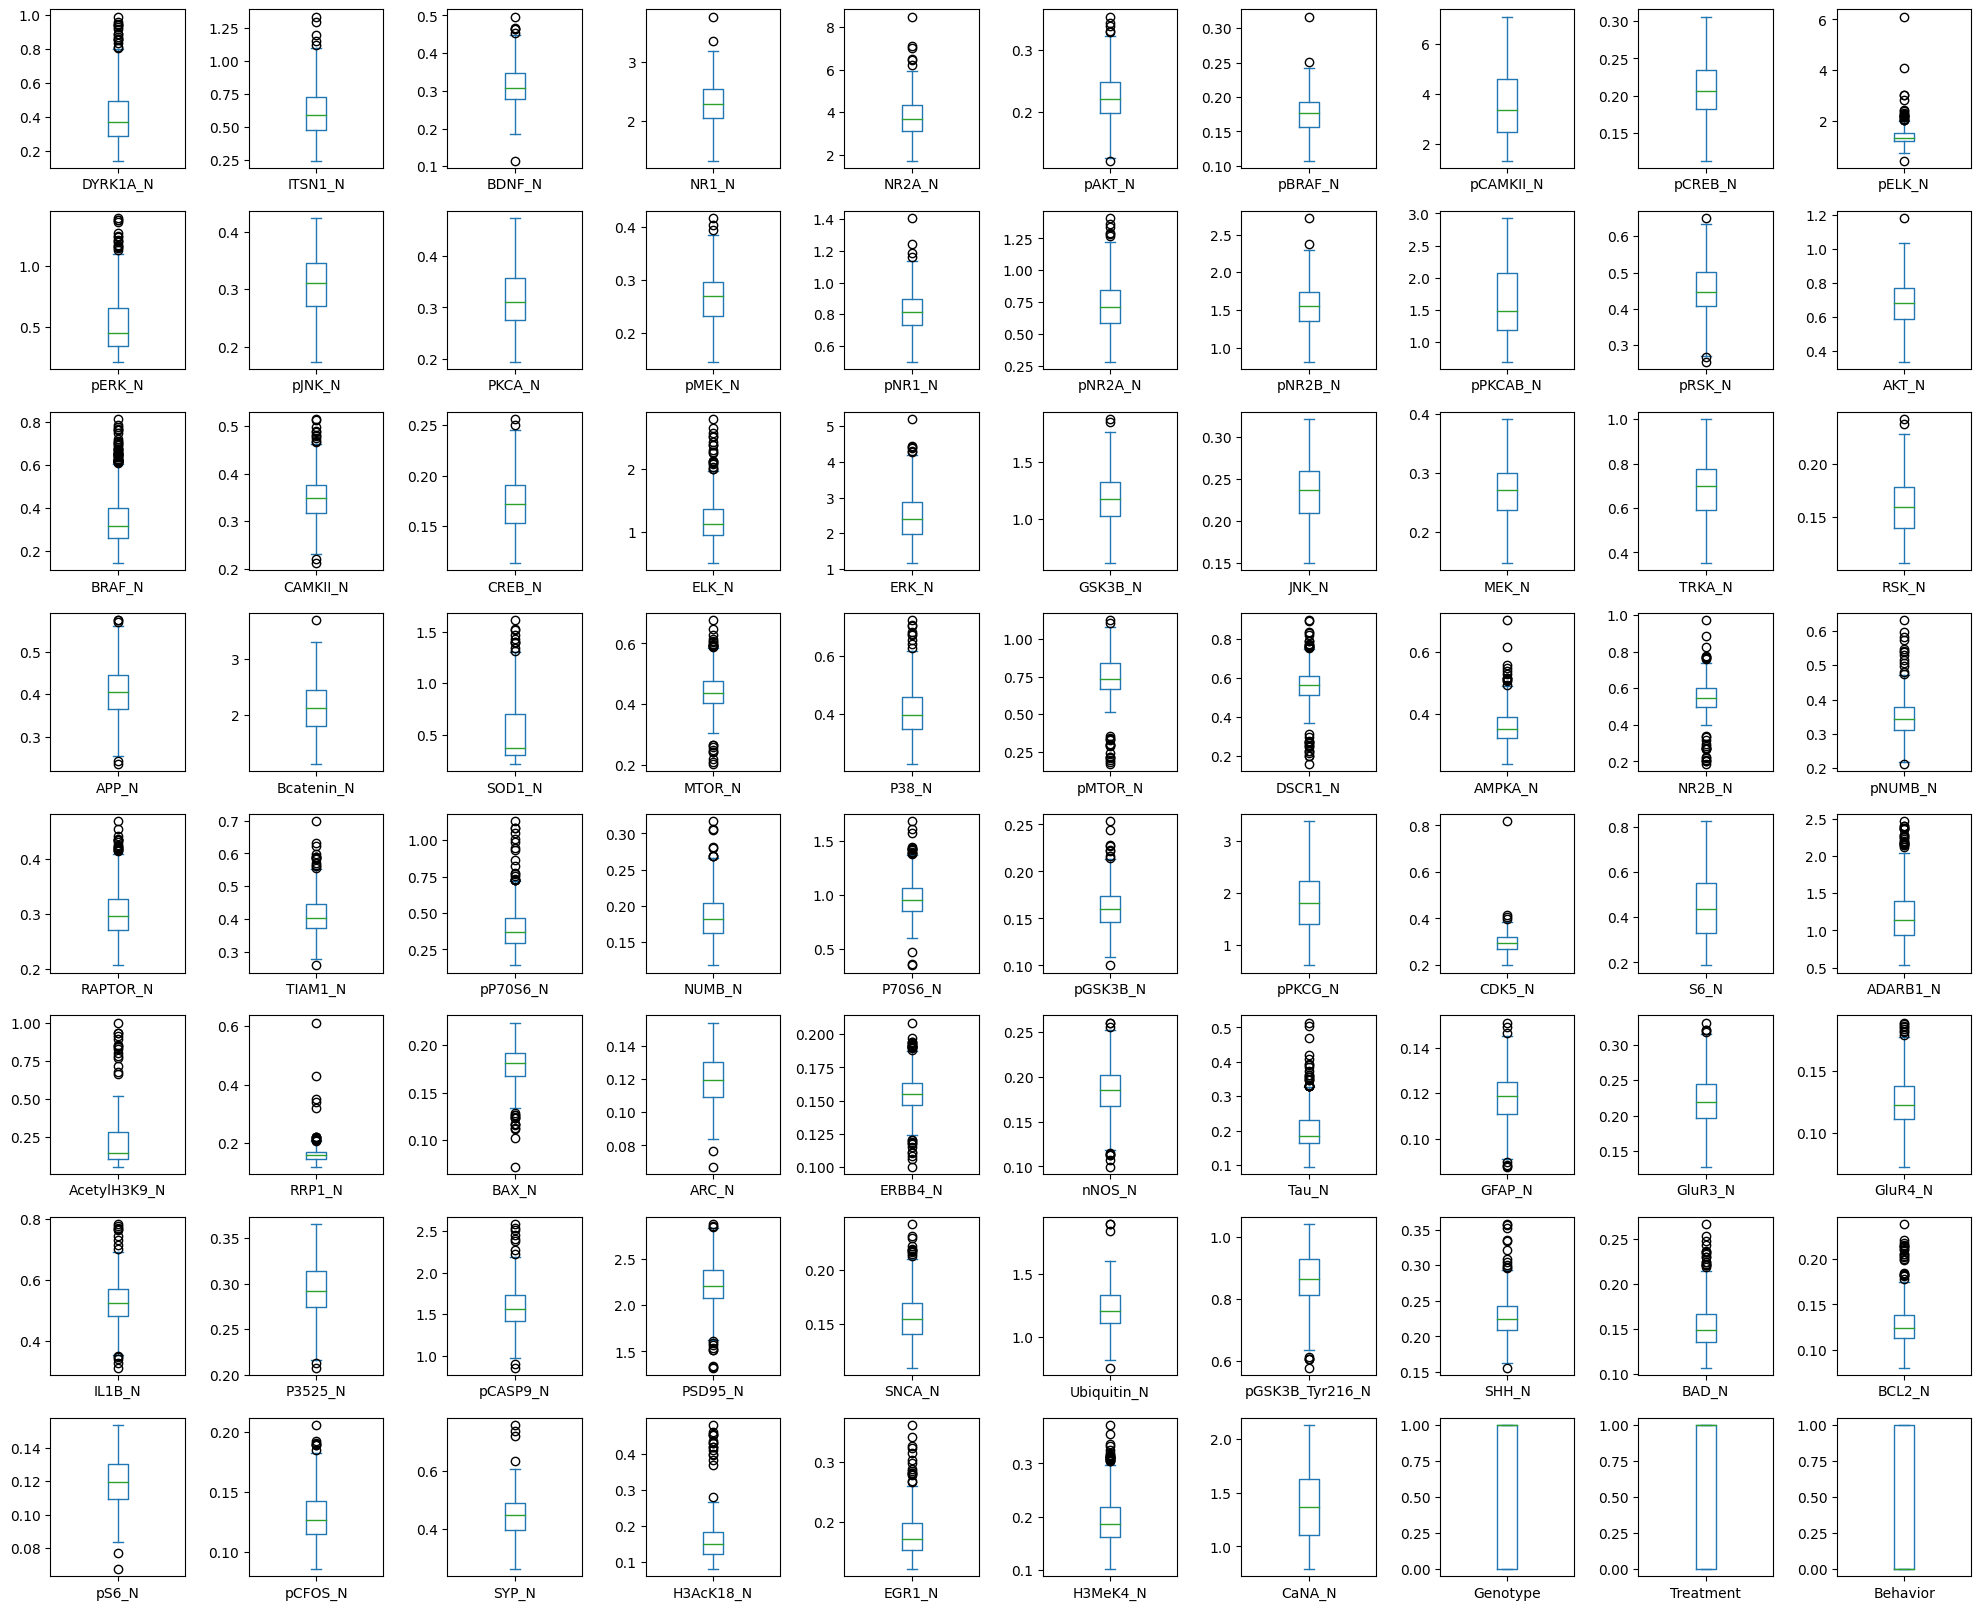

In [29]:
plt.figure(figsize=(15, 10))
df[numerical_cols].plot(kind='box', subplots=True, layout=(10, 10), sharex=False, sharey=False, figsize=(20, 20))
plt.tight_layout()
plt.show()

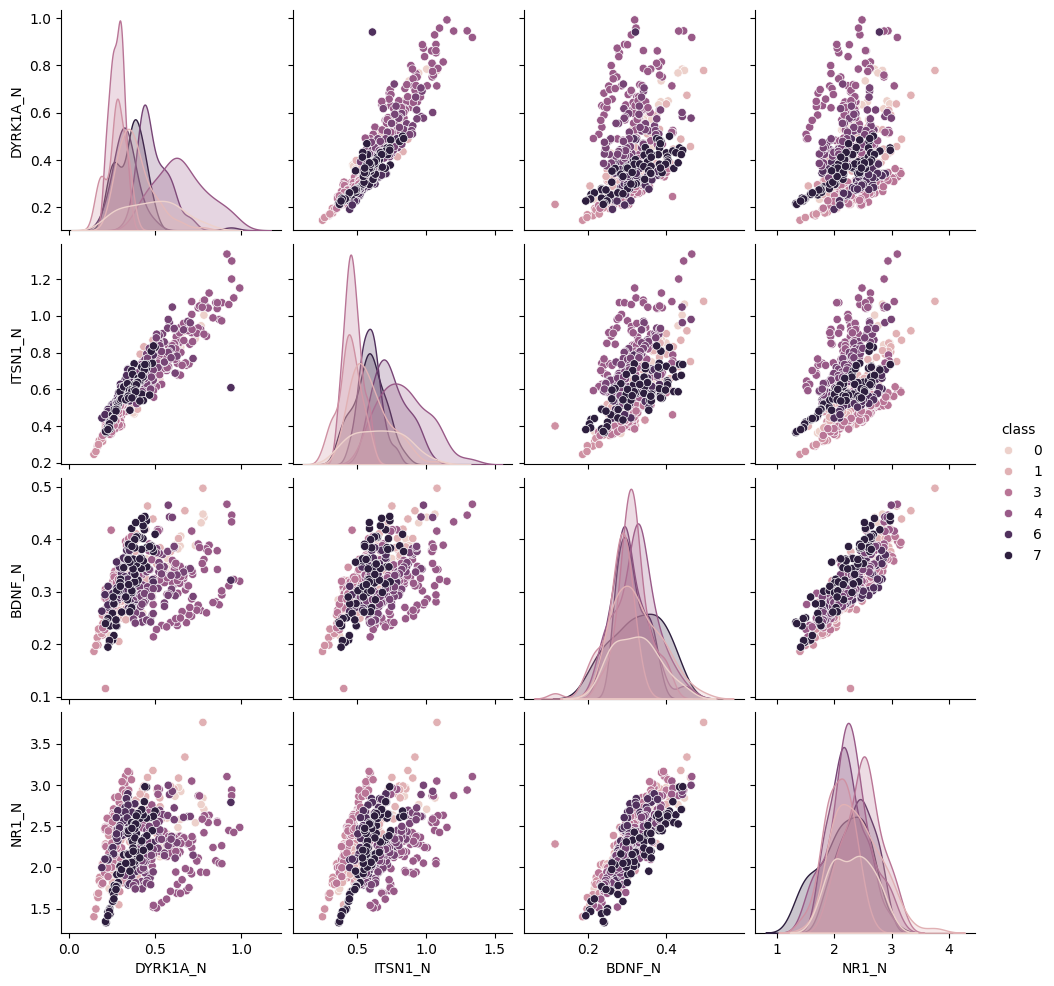

In [30]:
sns.pairplot(df[['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'class']], hue='class')
plt.show()

In [31]:
X = df.drop(columns=['MouseID', 'class'])
y = df['class']

In [32]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [33]:
correlation_threshold = 0.9
corr_matrix = pd.DataFrame(X_processed).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
X_reduced = X_processed[:, ~np.isin(range(X_processed.shape[1]), to_drop)]


In [34]:

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_reduced, y)
selector = SelectFromModel(clf, prefit=True)
X_selected = selector.transform(X_reduced)

In [36]:
feature_importances = clf.feature_importances_
selected_features = np.arange(X_reduced.shape[1])[selector.get_support()]

In [37]:
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances[selected_features]
}).sort_values(by='Importance', ascending=False)


In [38]:
print("\nSelected Features (Top 20):")
feature_importance_df.head(20)


Selected Features (Top 20):


,Feature,Importance
17,71,0.097594
16,70,0.076682
5,26,0.056499
9,40,0.049859
18,72,0.049568
15,69,0.034108
0,0,0.031733
13,50,0.027906
6,28,0.026352
12,47,0.022449


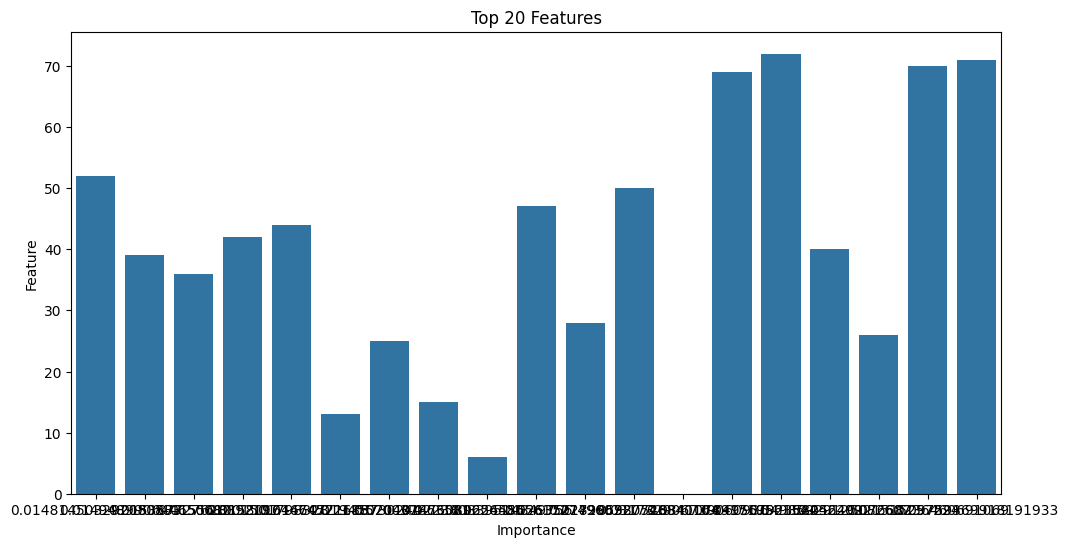

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Features')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state= 42)

In [42]:
rf_model= RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_train_rf = rf_model.predict(X_train)
y_test_rf = rf_model.predict(X_test)

train_acc_rf = accuracy_score(y_train, y_train_rf)
test_acc_rf = accuracy_score(y_test, y_test_rf)

print("Training Accuracy:", train_acc_rf)
print("Testing Accuracy:", test_acc_rf)
accuracy_rf = accuracy_score(y_test, y_test_rf)
print("Accuracy of Random Forest:", (accuracy_rf * 100))

print("Classification Report:")
print(classification_report(y_test, y_test_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_rf))

Training Accuracy: 1.0
Testing Accuracy: 0.990990990990991
Accuracy of Random Forest: 99.09909909909909
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        15
           2       1.00      0.95      0.97        20
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        17

    accuracy                           0.99       111
   macro avg       0.99      0.99      0.99       111
weighted avg       0.99      0.99      0.99       111

Confusion Matrix:
[[10  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0]
 [ 0  0 19  1  0  0  0  0]
 [ 0  0  0 10  0  0  0  0]
 [ 0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  

In [43]:
lg_model = LogisticRegression(max_iter=100)
lg_model.fit(X_train, y_train)

y_train_lg = lg_model.predict(X_train)
y_test_lg = lg_model.predict(X_test)

train_acc_lg = accuracy_score(y_train, y_train_lg)
test_acc_lg = accuracy_score(y_test, y_test_lg)

print("Training Accuracy:", train_acc_lg)
print("Testing Accuracy:", test_acc_lg)

accuracy_lg = accuracy_score(y_test, y_test_lg)
print("Accuracy of Logistic Regression:", (accuracy_lg * 100))

print("Classification Report:")
print(classification_report(y_test, y_test_lg))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_lg))

Training Accuracy: 1.0
Testing Accuracy: 1.0
Accuracy of Logistic Regression: 100.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        17

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

Confusion Matrix:
[[10  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0]
 [ 0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0 17]]


In [44]:
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)

y_train_dt = dt_model.predict(X_train)
y_test_dt = dt_model.predict(X_test)

train_acc_dt = accuracy_score(y_train, y_train_dt)
test_acc_dt = accuracy_score(y_test, y_test_dt)

print("Training Accuracy:", train_acc_dt)
print("Testing Accuracy:", test_acc_dt)

accuracy_dt = accuracy_score(y_test, y_test_dt)
print("Accuracy of Decision Tree:", (accuracy_dt * 100))

print("Classification Report:")
print(classification_report(y_test, y_test_dt))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_dt))

Training Accuracy: 1.0
Testing Accuracy: 1.0
Accuracy of Decision Tree: 100.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        17

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

Confusion Matrix:
[[10  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0]
 [ 0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0 17]]


In [45]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


y_train_svm = svm_model.predict(X_train)
y_test_svm = svm_model.predict(X_test)


train_acc_svm = accuracy_score(y_train, y_train_svm)
test_acc_svm = accuracy_score(y_test, y_test_svm)


print("Training Accuracy:", train_acc_svm)
print("Testing Accuracy:", test_acc_svm)


accuracy_svm = accuracy_score(y_test, y_test_svm)
print("Accuracy of SVM:", accuracy_svm * 100)


print("Classification Report:")
print(classification_report(y_test, y_test_svm))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_svm))


Training Accuracy: 1.0
Testing Accuracy: 1.0
Accuracy of SVM: 100.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        17

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

Confusion Matrix:
[[10  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0]
 [ 0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0 17]]


In [46]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_train_knn = knn_model.predict(X_train)
y_test_knn = knn_model.predict(X_test)


train_acc_knn = accuracy_score(y_train, y_train_knn)
test_acc_knn = accuracy_score(y_test, y_test_knn)


print("Training Accuracy:", train_acc_knn)
print("Testing Accuracy:", test_acc_knn)


accuracy_knn = accuracy_score(y_test, y_test_knn)
print("Accuracy of k-NN:", accuracy_knn * 100)

print("Classification Report:")
print(classification_report(y_test, y_test_knn))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_knn))

Training Accuracy: 1.0
Testing Accuracy: 0.9819819819819819
Accuracy of k-NN: 98.1981981981982
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.87      0.93        15
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        15
           5       0.80      1.00      0.89         8
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        17

    accuracy                           0.98       111
   macro avg       0.97      0.98      0.98       111
weighted avg       0.99      0.98      0.98       111

Confusion Matrix:
[[10  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  2  0  0]
 [ 0  0 20  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0]
 [ 0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0 1

In [ ]:
param_grid = {

    'n_estimators' : [50, 100, 200],
    'max_depth' : [5, 10, 15, None],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

Best parameters found:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy:  1.0


In [ ]:
best_model = grid_search.best_estimator_
best_params = best_model.get_params()
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
train_pred = best_rf_model.predict(X_train)
test_pred = best_rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

accuracy_best_rf = accuracy_score(y_test,test_pred)
print("Accuracy of best Random Forest:", (accuracy_best_rf * 100))

print("Classification Report:")
print(classification_report(y_test, test_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

Training Accuracy: 1.0
Testing Accuracy: 1.0
Accuracy of best Random Forest: 100.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        17

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

Confusion Matrix:
[[10  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0]
 [ 0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0 17]]
